# Car Price Prediction

This dataset includes used vehicles' specifications such as model, year, engine as well as their prices. We will estimate the prices of used cars with using these features. It will be Supervised Learning as the price feature is given. In addition, since our estimation is price value which is real-valued, we will have solved the Regression problem.


In our case first we will create a simple linear regression model. After that we will improve our model with using different algorithms.

***

## 1. Downloading Dataset
First step, as you guess, is downloading the dataset. 

The dataset can be fetched with Kaggle CLI by using below command.

#### kaggle datasets download -d CooperUnion/cardataset

or you can also download the dataset from the Kaggle site with the link below:

https://www.kaggle.com/CooperUnion/cardataset


After downloading the dataset, we need to unzip the file to read the dataset.

Let's move reading the dataset:
***

## 2. Reading and exploring the Data

To read and analyze the dataset we need to import some libraries.

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

# plt.style.use('ggplot')
sns.set()
%matplotlib inline

### 2.2 Read the csv file
To read csv files, common action is to use `read_csv` function of the pandas library. The `read_csv` function returns `pandas.core.frame.DataFrame` object. We need to assign it to a variable which is in this case the `df`.

In [2]:
df = pd.read_csv('../data/raw/data.csv')

With built-in `len` function of the Python, we find how many rows(records) in our dataset.

### 2.3 Show shape of the dataframe
Check the number of rows and columns in the data. \
**Remember**; samples are in rows, features are in columns. \
If we look at the output of the DataFrame `shape`, we see that we have 11914 samples and 16 features.

In [3]:
df.shape

(11914, 16)

### 2.4 Show Data Types
Check the type of data stored in each column

In [4]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

### 2.5 What categorical values the `Make` and `Transmission Type` columns has?
Let's look at the value_counts function to find categories and their counts.

In [5]:
df.Make.value_counts()

Chevrolet        1123
Ford              881
Volkswagen        809
Toyota            746
Dodge             626
Nissan            558
GMC               515
Honda             449
Mazda             423
Cadillac          397
Mercedes-Benz     353
Suzuki            351
BMW               334
Infiniti          330
Audi              328
Hyundai           303
Volvo             281
Subaru            256
Acura             252
Kia               231
Mitsubishi        213
Lexus             202
Buick             196
Chrysler          187
Pontiac           186
Lincoln           164
Oldsmobile        150
Land Rover        143
Porsche           136
Saab              111
Aston Martin       93
Plymouth           82
Bentley            74
Ferrari            69
FIAT               62
Scion              60
Maserati           58
Lamborghini        52
Rolls-Royce        31
Lotus              29
Tesla              18
HUMMER             17
Maybach            16
Alfa Romeo          5
McLaren             5
Spyker    

and let's look at another column, Transmission Type.

In [6]:
df["Transmission Type"].value_counts()

AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
Name: Transmission Type, dtype: int64

You can check `object` typed columns like above. This is important to determine categorical attributes. We will deal with them later.


### 2.6 Check the statistics of the dataframe
We can see the data statistically with `describe` function.

In [7]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


### 2.7 Check the first 5 rows of the dataframe
Let's look the first five rows of our DataFrame with `head()` function.

In [8]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## 3. Preprocessing the Data

At first glance at the dataset, it is noticed that the column names and their contents are not in the correct format, especially contents that may be categorical variables such as the `Driven_Wheels` column's content. 

### 3.1 Normalize the columns names
First, let's normalize the column names by replacing all spaces with underscores and all letters with lowercase letters.

In [9]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

After manipulation, there is now more convenient format for the column names.

In [10]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

> **Note**: *The columns wich are `object type` are assumed as `categorical data`. Beyond changing the form of categorical data, to increase our model's accuracy,  the categorical data needs to be preprocessed to be input to our model . We will work on this later.*

<p> Also, to uniform the content of the columns which are object type, we implement the same form changes to them: 

Our rule is, again, ___replace all spaces with underscore and lowercase all letters.___

</p>

### 3.2 Uniform the content of the columns which are object type(categorical)
#### To do that:

**a.** Select only columns with string values which are `object` data types.

In [11]:
string_columns = list(df.dtypes[df.dtypes == 'object'].index)

**b.** Make the appropriate changes to the content of the string columns according to the above rule.

In [12]:
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

Let's have a look at the first five rows again.

In [13]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


With these changes, you will see that we will handle the categorical variables easily.

## 4. Target Variable Analysis

One of the best ways to describe a variable is to report the values that appear in the dataset and how many times each value appears. This is called `distribution` of the variable.

The most common way to represent the distribution is plotting by using `histogram` which is a graph that shows the `frequency` of each value.

Let's plot the MSRP(*Manufacture's suggested Retail Price*) feature which is our target variable, **y**, the value which we want to predict.

### 4.1 Show the distribution of the `MSRP` column

<Axes: xlabel='msrp', ylabel='Count'>

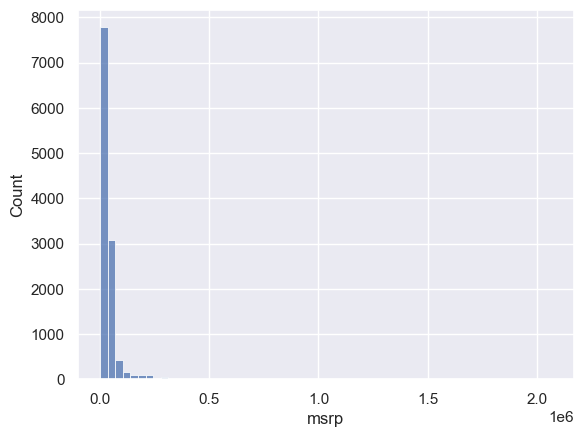

In [14]:
sns.histplot(df.msrp, bins=60)

Notice that the distribution of prices is asymmetric; it has very long tail that extends farther to the left than to the right. That means, there are many cars with low prices on the left side of the graph.

Let's have a closer look by zooming left side of the graph by looking at values below $100,000

<Axes: xlabel='msrp', ylabel='Count'>

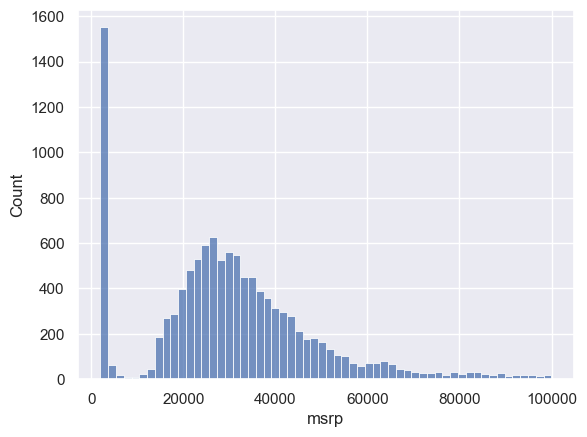

In [15]:
sns.histplot(df.msrp[df.msrp < 100000])

We also notice a lot of cars that cost $1,000. Such distribution can greatly confuse the model, and may make a bit harder for some Machine Learning algorithms to detect patterns.

One way to solve this problem is **log transformation**. If we apply the log function to the prices, it removes the undesired effect.

### 4.2 Log transformation of the `MSRP` column

In [16]:
log_price = np.log1p(df.msrp)

Let's have a look at the historam of the msrp feature which is our target variable after log transformation.

<Axes: xlabel='msrp', ylabel='Count'>

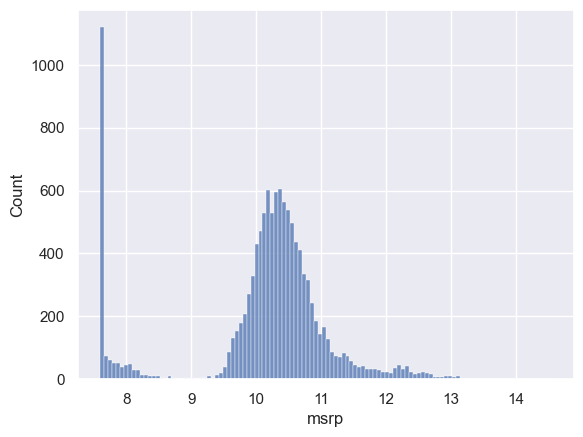

In [17]:
sns.histplot(log_price)

The graph shows that we have still a large peak in lower prices which means the distribution is not normal but the transformation removes the long tail, and we have the *bell-shaped curve* which is what we want.

### 5. Looking for Correlations

### 5.1 Show the correlation matrix of the dataframe

In [18]:
corr_matrix = df.corr(numeric_only=True)
print(corr_matrix)

                      year  engine_hp  engine_cylinders  number_of_doors  \
year              1.000000   0.351794         -0.041479         0.263787   
engine_hp         0.351794   1.000000          0.779988        -0.102713   
engine_cylinders -0.041479   0.779988          1.000000        -0.140088   
number_of_doors   0.263787  -0.102713         -0.140088         1.000000   
highway_mpg       0.258240  -0.406563         -0.621606         0.118570   
city_mpg          0.198171  -0.439371         -0.600776         0.120881   
popularity        0.073049   0.037501          0.041145        -0.048272   
msrp              0.227590   0.662008          0.531312        -0.126635   

                  highway_mpg  city_mpg  popularity      msrp  
year                 0.258240  0.198171    0.073049  0.227590  
engine_hp           -0.406563 -0.439371    0.037501  0.662008  
engine_cylinders    -0.621606 -0.600776    0.041145  0.531312  
number_of_doors      0.118570  0.120881   -0.048272 -0.1266

In [30]:
corr_matrix["msrp"].sort_values(ascending=False)

msrp                1.000000
engine_hp           0.662008
engine_cylinders    0.531312
year                0.227590
popularity         -0.048476
number_of_doors    -0.126635
city_mpg           -0.157676
highway_mpg        -0.160043
Name: msrp, dtype: float64

The correlation coefficient ranges from -1 to 1. When it is close to 1, that means that there is a strong positive correlation; for example, the `msrp` tends to go up when the `engine_hp` goes up. When the coefficient is close to -1, that means, there is a strong negative correlation; there is a negative correlation between `engine_cylinder` and both  `highway_mpg` and `city_mpg`, means; as the number of cylinder increases, the miles per gallon will decrease. Finally, if coefficient close to 0 mean that there is no linear correlation.

I put a zoomed example of `msrp` and `engine_hp` below. You can see the positive correlation on the graph.

<Axes: xlabel='msrp', ylabel='engine_hp'>

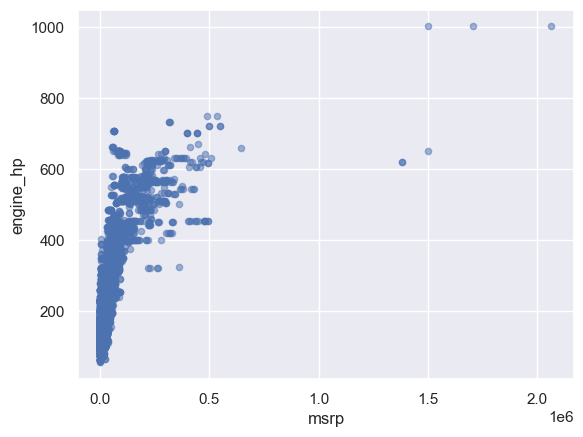

In [20]:
df.plot(kind="scatter", x="msrp", y="engine_hp", alpha=0.5)

Also, we can see the correlation matrix as a heatmap to distinguish correlations between features. This can tell you which variables are related to one another.
### 5.2 Show the Correlation Matrix of the dataframe as Heat Map

<Axes: >

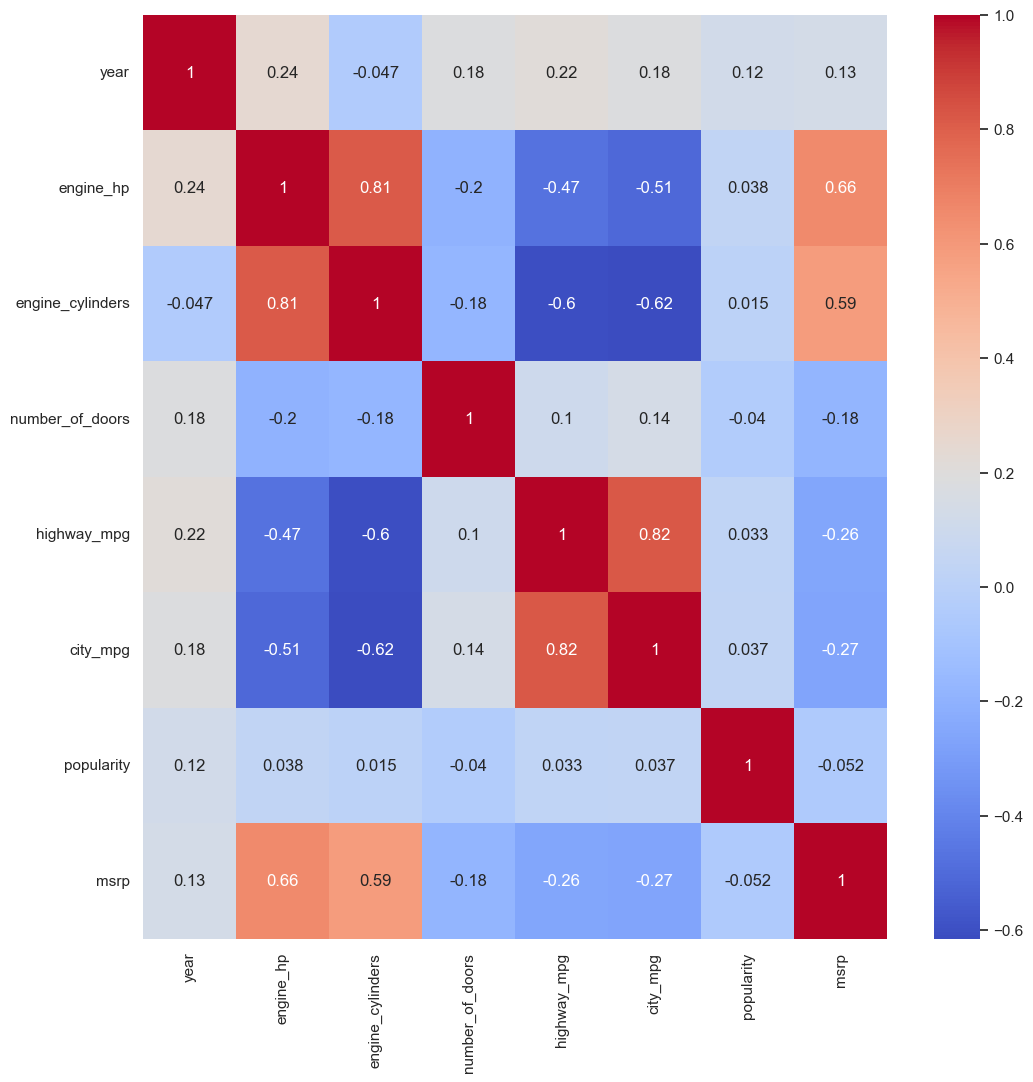

In [21]:
plt.figure(figsize=(12,12))
df_without_missing_val = df.dropna()
sns.heatmap(df_without_missing_val.corr(numeric_only=True), annot=True, cmap="coolwarm")

## 6. Checking for Missing Values

The most important process is handling missing values because Machine Learning models cannot deal with them automatically. 

There are three strategies for working with missing values include:

* We can remove (or “drop”) the rows or columns holding the missing values.
* We can impute the missing values.
* We can build models that work around them, and only use the information provided.


Pandas has a convenient function that shows missing values for each feature:

In [23]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

The first thing we see is that MSRP — our target variable — does not have any missing
values. This result is good, because otherwise, such records won’t be useful to us: we
always need to know the target value of an observation to use it for training the model.

## 7. Checking Number of Unique Values

In [24]:
df.nunique()

make                   48
model                 914
year                   28
engine_fuel_type       10
engine_hp             356
engine_cylinders        9
transmission_type       5
driven_wheels           4
number_of_doors         3
market_category        71
vehicle_size            3
vehicle_style          16
highway_mpg            59
city_mpg               69
popularity             48
msrp                 6049
dtype: int64

*nunique* function, supports our work for categorical values, apart from showing the number of distinct elements. For example; as a categorical predictor, "**Transmission Type**" has 5 singular values as you see on the table above. These are, **AUTOMATIC**, **MANUAL**, **AUTOMATED_MANUAL**, **DIRECT_DRIVE**, **UNKNOWN**. We will develop a strategy for categorical values based on these number of unique elements.

## 8. Begin to train
#### The sequence of approaches we will follow will be as follows:
 8.1 Create **predictor** and **target** values
 8.2 Analysis, improvement and search for solutions with Ensemble method **Random Forest Regressor**
 8.3 Analysis, improvement and search for solutions with the Ensemble method, **Decision Tree Regressor**


#### For each algorithm we choose at 8.2 and 8.3 item, we will consider the following list as a guide in the sub-breakdown
* instantiate regresssor
* fit training
* predict test data
* score your model on the test

First, let's import `train_test_split` to generate train, validation and test sub-datasets

In [25]:
from sklearn.model_selection import train_test_split

### 8.1 Create predictor and target values
Below line of code splits our dataset as train, test and validation. Note that, we set the **random_state** parameter to generate the same shuffled indices. It assures the same train and test split will occur for different users in different computers.

In [26]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [27]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=1)

print(df_train.shape)
print(df_val.shape)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# To provide the relevance of the data distribution for training, we make the logarithm transformation of the target data.
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

# Because msrp is the target variable of the data we need to remove them from train, validation and test dataframes
del df_train["msrp"]
del df_val["msrp"]
del df_test["msrp"]

(7148, 16)
(2383, 16)


In [28]:
print(df_train.shape)
print(df_val.shape)
print(df_test.shape)

(7148, 15)
(2383, 15)
(2383, 15)


We will use `DictVectorizer` to turn train and validation into matrices. I created a function to vectorize any DataFrame.

In [29]:
# columns_without_msrp = df.drop(['msrp'], axis=1)
# numeric_features = list(df_train.dtypes[df_train.dtypes == 'object'].index)
from sklearn.feature_extraction import DictVectorizer
def dictionary_vectorizer(train_df: pd.DataFrame, validation_df: pd.DataFrame) -> tuple:
    """
    It vectorizers dataframes to build models
    :param train_df: train dataframe
    :param validation_df: validation dataframe
    :return: vectorized_X_train, vectorized_x_val
    """
    features = list(train_df.columns.values)
    train_dict = train_df[features].to_dict(orient='records')
    val_dict = validation_df[features].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    vectorized_X_train = dv.fit_transform(train_dict)
    vectorized_x_val = dv.transform(val_dict)
    return vectorized_X_train, vectorized_x_val

 ### 8.2 Analysis, improvement and search for solutions with Ensemble method **Random Forest Regressor**

In [65]:
from sklearn.ensemble import RandomForestRegressor

In [66]:
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
vectorized_X_train, vectorized_x_val = dictionary_vectorizer(df_train, df_val)
print(vectorized_X_train.shape, vectorized_x_val.shape)
rf.fit(vectorized_X_train, vectorized_x_val)

(7148, 1045) (2383, 1045)


ValueError: Input X contains NaN.
RandomForestRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

As you can see, you can't fit your model with missing values. So we have to deal with those, but how?
We have a number of approaches to the solution, but first let me show you a summary of the missing values.

In [69]:
print(df_train.shape)
print(df_val.shape)

df_train.fillna(0, inplace=True)
df_val.fillna(0, inplace=True)
vectorized_X_train, vectorized_x_val = dictionary_vectorizer(df_train, df_val)
print(vectorized_X_train.shape, vectorized_x_val.shape)
rf.fit(vectorized_X_train, y_train)

(7148, 15)
(2383, 15)
(7148, 1045) (2383, 1045)


RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [70]:
y_pred = rf.predict(vectorized_x_val)

In [72]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_val, y_pred))

0.1153449734695386

In [31]:
# Because the type of X_train is numpy.ndarray, we need to convert to DataFrame type to handle missing values
X_train_for_missing_values = pd.DataFrame(X_train)


# Shape of training data (num_rows, num_columns)
print(X_train.shape)

# Number of missing values in each column of training data
missing_val_count_by_column = (X_train.isnull().sum())
# print(missing_val_count_by_column[missing_val_count_by_column > 0])

(7148, 1045)


AttributeError: 'numpy.ndarray' object has no attribute 'isnull'

Let's define a function to measure quality of each approach. We will measure by using **RandomForestRegressor** which is an ensemble learning method for regression by generating a large number of decision trees during the training phase and **Mean Absolute Error(MAE)** by calculating the absolute difference between the model predictions and actual(true) values.

MAE formulation is below:
$MAE = \frac{1}{n} \sum \limits _{i=1} ^{n}|y_{i}-\hat{y_{i}}|$

Below function will return scores for each approach and we will select the lowest one.

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=10, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

### Approach 1: Drop columns with missing values

First we need to get column names with missing values.

In [46]:
cols_with_missing = [col for col in X_train.columns
                    if X_train[col].isnull().any()]

Since we are working with both training and validation sets, we will drop columns with missing values from both DataFrames.

In [47]:
reduced_X_train = X_train.drop(cols_with_missing, axis=1)
reduced_X_valid = X_valid.drop(cols_with_missing, axis=1)

print("MAE from Approach 1 (Drop columns with missing values:)")
print(score_dataset(reduced_X_train, reduced_X_valid, y_train, y_valid))

MAE from Approach 1 (Drop columns with missing values:)
5330.401026233355


Our score with **dropping columns with missing values** approach is 5330.401026233355.
Let's jump to the second approach.

### Approach 2:  Imputation

Next, we use `SimpleImputer` to replace missing values with the mean value along each column.

In [48]:
from sklearn.impute import SimpleImputer

# Imputation
my_imputer = SimpleImputer(strategy='mean')
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(my_imputer.transform(X_valid))

# Imputation removed column names; put them back
imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_valid.columns

print("MAE from Approach 2 (Imputation:)")
print(score_dataset(imputed_X_train, imputed_X_valid, y_train, y_valid))

MAE from Approach 2 (Imputation:)
4023.759051625192


We see that Approach 2 has lower _MAE_ than **Approach 1**, so **Approach 2** performed better on this dataset.

### Approach 3: An Extension to Imputation
Next, we impute the missing values, while also keeping track of which values were imputed.

In [49]:
# Make copy to avoid changing original data
X_train_plus = X_train.copy()
X_valid_plus = X_valid.copy()

# Make new columns indicating what will be imputed
for col in cols_with_missing:
    print(col)
    X_train_plus[col + '_was_missing'] = X_train_plus[col].isnull()
    X_valid_plus[col + '_was_missing'] = X_valid_plus[col].isnull()
    
# Imputation
my_imputer = SimpleImputer()
imputed_X_train_plus = pd.DataFrame(my_imputer.fit_transform(X_train_plus))
imputed_X_valid_plus = pd.DataFrame(my_imputer.transform(X_valid_plus))

imputed_X_train_plus.columns = X_train_plus.columns
imputed_X_valid_plus.columns = X_valid_plus.columns

print("MAE from Approach 3 (An Extension to Imputation:)")
print(score_dataset(imputed_X_train_plus, imputed_X_valid_plus, y_train, y_valid))

engine_hp
engine_cylinders
number_of_doors
MAE from Approach 3 (An Extension to Imputation:)
4024.0344410424773


As we can see, **Approach 3** performed slightly worse than **Approach 2**.

In conclution, imputing missing values (in **Approach 2** and **Approach 3**) yielded better results, relative to when we simply dropped columns with missing values (in **Approach 1**).

## Categorical Variables

A **categorical variable** takes only a limited number of values.

You can find the list of categorical variables below.

In [50]:
# Get list of categorical variables
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['make', 'model', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style']


We have, again, 3 approaches; Drop Categorical Variables, Ordinal Encoding and One-Hot Encoding.

Bu üç yaklaşıma başlamadan önce, verinin ön hazırlığı önerilen şekilde hazırlayıp bu üç yöntemi deneyeceğiz. Sonrasında da daha basit bir yolu deneyerek karşılaştırma yapacağız. 

Before starting, we will apply preprocesing and observe scores with the recommended way which is briefly concatanating low cardinality columns with numerical columns. Low cardinality means, categorical columns with less number of unique values. We will choose the number of unique values less than 10 for each categorical columns.

Let's do the preprocessing:

In [51]:
y = df.msrp
X = df.drop(['msrp'], axis=1)

# Divide data into training and validation subsets
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

# Drop columns with missing values (simplest approach)
# cols_with_missing = [col for col in df.columns if df[col].isnull().any()]

# X_train_full.drop(cols_with_missing, axis=1, inplace=True)
# X_valid_full.drop(cols_with_missing, axis=1, inplace=True)

In [52]:
X_train_full.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        2
engine_hp              58
engine_cylinders       24
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3003
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
dtype: int64

In [53]:
X_train_numerical = X_train_full.select_dtypes(exclude=['object'])
X_valid_numerical = X_train_full.select_dtypes(exclude=['object'])


X_train_categorical = X_train_full.select_dtypes(exclude=["float64", "int64"])
X_valid_categorical = X_train_full.select_dtypes(exclude=["float64", "int64"])


# SIMPLE IMPUTER
my_imputer = SimpleImputer(strategy='mean')
imputed_X_train_numerical = pd.DataFrame(my_imputer.fit_transform(X_train_numerical))
imputed_X_valid_numerical = pd.DataFrame(my_imputer.transform(X_valid_numerical))

imputed_X_train_numerical.fillna(999, inplace=True)
imputed_X_valid_numerical.fillna(999, inplace=True)

imputed_X_train = imputed_X_train_numerical + X_train_categorical
imputed_X_valid = imputed_X_valid_numerical + X_valid_categorical


# Imputation removed column names; put them back
imputed_X_train.columns = X_train_full.columns
imputed_X_valid.columns = X_valid_full.columns

In [54]:
# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
low_cardinality_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]

# low_cardinality_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype == "object"]


# Select numerical columns
numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = low_cardinality_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

In [55]:
X_train.fillna(X_train.median(), inplace=True)
X_valid.fillna(X_valid.median(), inplace=True)

In [56]:
X_train = X_train.reset_index()
X_valid = X_valid.reset_index()

In [57]:
low_cardinality_cols

['transmission_type', 'driven_wheels', 'vehicle_size']

In [58]:
X_train.isnull().sum()

index                0
transmission_type    0
driven_wheels        0
vehicle_size         0
year                 0
engine_hp            0
engine_cylinders     0
number_of_doors      0
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [59]:
X_valid.isnull().sum()

index                0
transmission_type    0
driven_wheels        0
vehicle_size         0
year                 0
engine_hp            0
engine_cylinders     0
number_of_doors      0
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

Let's examine these three topics one by one. 

 ### Approach 1: Drop Categorical Variables
 
 The easiest approach is to simply remove from the dataset. 
 We drop the `object` columns from our dataset with using `select_dtypes()` method.

In [60]:
X_train.head()

,index,transmission_type,driven_wheels,vehicle_size,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity
0,9030,automatic,rear_wheel_drive,large,2016,285.0,8.0,3.0,16,11,549
1,8817,manual,four_wheel_drive,compact,1990,160.0,6.0,2.0,19,15,549
2,7759,automatic,all_wheel_drive,compact,2017,200.0,4.0,4.0,28,20,3105
3,4896,automatic,rear_wheel_drive,compact,2014,200.0,4.0,2.0,34,25,105
4,2151,manual,front_wheel_drive,compact,2010,172.0,4.0,4.0,29,23,1851


In [61]:
# Make copy to avoid changing original data
label_X_train = X_train.copy()
label_X_valid = X_valid.copy()

drop_X_train = label_X_train.select_dtypes(exclude=['object'])
drop_X_valid = label_X_valid.select_dtypes(exclude=['object'])

print("MAE from Approach 1 (Drop categorical variables):")
print(score_dataset(drop_X_train, drop_X_valid, y_train, y_valid))

MAE from Approach 1 (Drop categorical variables):
3789.3088543852286


## Approach 2: Ordinal encoding

Scikit-learn has a `OrdinalEncoder` class that can be used to get ordinal encodings. We loop over the categorical variables and apply the ordinal encoder separately to each column.

### With low cardinality

In [62]:
object_cols

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [63]:
X_train.head()

,index,transmission_type,driven_wheels,vehicle_size,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity
0,9030,automatic,rear_wheel_drive,large,2016,285.0,8.0,3.0,16,11,549
1,8817,manual,four_wheel_drive,compact,1990,160.0,6.0,2.0,19,15,549
2,7759,automatic,all_wheel_drive,compact,2017,200.0,4.0,4.0,28,20,3105
3,4896,automatic,rear_wheel_drive,compact,2014,200.0,4.0,2.0,34,25,105
4,2151,manual,front_wheel_drive,compact,2010,172.0,4.0,4.0,29,23,1851


In [64]:
from sklearn.preprocessing import OrdinalEncoder

# Make copy to avoid changing original data
label_X_train = X_train.copy()
label_X_valid = X_valid.copy()

# Apply ordinal encoder to each column with categorical data
ordinal_encoder = OrdinalEncoder(handle_unknown='ignore')
label_X_train[low_cardinality_cols] = ordinal_encoder.fit_transform(X_train[low_cardinality_cols])
label_X_valid[low_cardinality_cols] = ordinal_encoder.transform(X_valid[low_cardinality_cols])

print("MAE from Approach 2 (Ordinal Encoding):") 
print(score_dataset(label_X_train, label_X_valid, y_train, y_valid))

MAE from Approach 2 (Ordinal Encoding):
3764.473227024758


### Score from Approach 3 (One-Hot Encoding)

In [65]:
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[low_cardinality_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[low_cardinality_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(low_cardinality_cols, axis=1)
num_X_valid = X_valid.drop(low_cardinality_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

print("MAE from Approach 3 (One-Hot Encoding):") 
print(score_dataset(OH_X_train, OH_X_valid, y_train, y_valid))

MAE from Approach 3 (One-Hot Encoding):
3741.6475451112033


### PIPELINE

In [66]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
     ('imputer', SimpleImputer(strategy='constant')),
     ('std_scaler', StandardScaler())
]) 

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, low_cardinality_cols)
    ])

In [67]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=200, random_state=0)

In [68]:
from sklearn.metrics import mean_absolute_error

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)
                     ])

In [69]:
# Preprocessing pf training data, fit model
my_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['year', 'engine_hp',
                                                   'engine_cylinders',
                                                   'number_of_doors',
                                                   'highway_mpg', 'city_mpg',
                                                   'popularity']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                  

In [70]:
# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_valid)

In [71]:
# Evaluate the model
score = mean_absolute_error(y_valid, preds)
print('MAE:', score)

MAE: 3714.2901358015515


In [76]:
df[attributes]

,make,year,engine_hp,transmission_type,market_category,vehicle_size,vehicle_style,msrp
0,bmw,2011,335.0,manual,"factory_tuner,luxury,high-performance",compact,coupe,46135
1,bmw,2011,300.0,manual,"luxury,performance",compact,convertible,40650
2,bmw,2011,300.0,manual,"luxury,high-performance",compact,coupe,36350
3,bmw,2011,230.0,manual,"luxury,performance",compact,coupe,29450
4,bmw,2011,230.0,manual,luxury,compact,convertible,34500
...,...,...,...,...,...,...,...,...
11909,acura,2012,300.0,automatic,"crossover,hatchback,luxury",midsize,4dr_hatchback,46120
11910,acura,2012,300.0,automatic,"crossover,hatchback,luxury",midsize,4dr_hatchback,56670
11911,acura,2012,300.0,automatic,"crossover,hatchback,luxury",midsize,4dr_hatchback,50620
11912,acura,2013,300.0,automatic,"crossover,hatchback,luxury",midsize,4dr_hatchback,50920


array([[<AxesSubplot:xlabel='year', ylabel='year'>,
        <AxesSubplot:xlabel='engine_hp', ylabel='year'>,
        <AxesSubplot:xlabel='msrp', ylabel='year'>],
       [<AxesSubplot:xlabel='year', ylabel='engine_hp'>,
        <AxesSubplot:xlabel='engine_hp', ylabel='engine_hp'>,
        <AxesSubplot:xlabel='msrp', ylabel='engine_hp'>],
       [<AxesSubplot:xlabel='year', ylabel='msrp'>,
        <AxesSubplot:xlabel='engine_hp', ylabel='msrp'>,
        <AxesSubplot:xlabel='msrp', ylabel='msrp'>]], dtype=object)

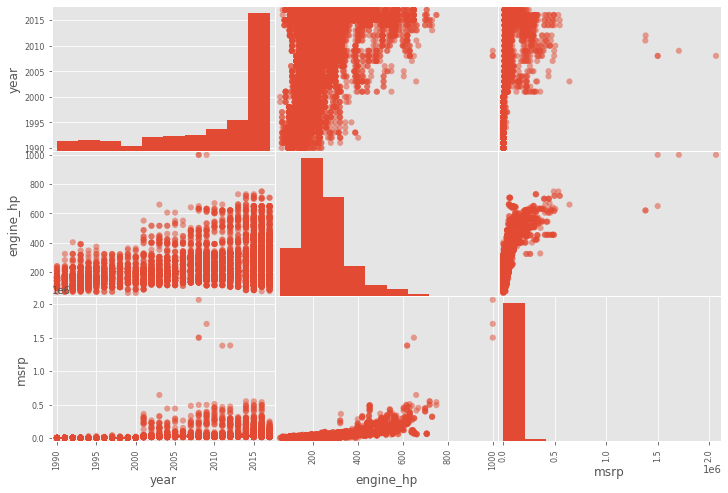

In [89]:
from pandas.plotting import scatter_matrix

attributes = ['make','year', 'engine_hp', 'transmission_type', 'market_category', 'vehicle_size', 'vehicle_style', 'msrp']

scatter_matrix(df[attributes], figsize=(12, 8), s=150)

In [ ]:
# Make copy to avoid changing original data
# X_train_a1 = X_train.copy()
# X_valid_a1 = X_valid.copy()

#X_train_a1 = imputed_X_train.copy()
#X_valid_a1 = imputed_X_valid.copy()

X_train_a1 = reduced_X_train.copy()
X_valid_a1 = reduced_X_valid.copy()



#X_train_a1.fillna(999, inplace=True)
#X_valid_a1.fillna(999, inplace=True)

drop_X_train = X_train_a1.select_dtypes(exclude=['object'])
drop_X_valid = X_valid_a1.select_dtypes(exclude=['object'])

print("MAE from Approach 1 (Drop categorical variables):")
print(score_dataset(drop_X_train, drop_X_valid, y_train, y_valid))

In [ ]:
np.any(np.isnan(X_train))

In [ ]:
np.any(np.isnan(X_valid_a1))

In [ ]:

 
     
 
 2) Ordinal Encoding
 
     This approach assumes an ordering of the categories. 
     For example, "red" is 1, "green" is 2, and "blue" is 3.
 
 3) One-Hot Encoding
 
     One-hot encoding creates new columns indicating the presence (or absence) of each possible value in the original data. 

### Baseline solution

To be able to use it, we need to have some data: a matrix $X$ and a vector with the target variable $y$. We have already prepared the $y$, but we still don't have the $X$: what we have right noe is a data frame, not a matrix. So we need to extract some features from our dataset to create this matrix X.

In the previous example, we used only three features. This time, we include a couple more features and use the following columns:
* engine_hp
* engine_cylinders
* highway_mpg
* city_mpg
* popularity

Let's select the features from the data frame and write them to a new variable, df_num:

In [ ]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
df_num = df_train[base]

The dataset has missing values,so we need to do something because the linear regression model cannot deal with missing values automatically.

The simplest possible approach is to fill the missing values with zeros. We can use the $fillna$ method from Pandas:

In [ ]:
df_num = df_num.fillna(0)

This method may not be the best way to deal with missing values, but often, it's good enough. If we set the missing feature value to zero, the respective feature is simply ignored.

**NOTE:** An alternative option is to replace the missing values with the average values. For some variables, for example, the number of cylinders, the value of zero doesn't make much sense: a car cannot have zero cylinders. However, this will make our code more complex and won't have a significant impact on the results. That's why we follow a simpler approach and replace missing values with zeros.

In our case, we have five features, so the formula is:

$g(X_{i})=w_{0} + x_{i1}w_{1} + x_{i2}w_{2} + x_{i3}w_{3} + x_{i4}w_{4} + x_{i5}w_{5}$

Now we need to convert this DataFrame to a NumPy array. The easiest way to do is to use its $values$ property:

In [ ]:
X_train = df_num.values

X_train is a matrix -- a two-dimensional NumPy array. We can use a input to our linear_regression function.

In [ ]:
w_0, w = train_linear_regression(X_train, y_train) 

We have just trained the first model! Now we can apply it to the training data to see how well it predicts:

In [ ]:
y_pred = w_0 + X_train.dot(w)

To see how good the predictions are, we can use $histplot$ -- a function from $Seaborn$ for plotting histograms that we used previously -- to plot the predicted values and compare them with the actual prices:

In [ ]:
sns.histplot(y_pred, label='prediction')
sns.histplot(y_train, label='target')
plt.legend()

We can see from the plot that the distribution of values we predicted looks quite different from the actual values. This result may indicate that the model is not powerful enough to capture the distribution of the target variable. This shouldn't be a suprise to us: the model we used is quite basic and includes only five very simple features.

### RMSE: Evaluating model quality

Looking at plots and comparing the distributions of the actual target variable with the predictions is a good way to evaluate quality, but we cannot do this every time we change something in the model. Instead, we need to use a metric that quantifies the quality of the model. We can use many metrics to evaluate how well a regression model behaves.
The most commonly used one is __root mean squared error__ --- RMSE for short.

RMSE tells us how large the errors are that our model makes. Its computed with the following formula:

$RMSE = \sqrt{\frac{1}{m} \sum \limits _{i=1} ^{m}(g(x_{i})-y_{i})^{2}}$

Let's try to understand the equition:

$(g(x_{i})-y_{i})^{2}$

This is the difference between the prediction we make for the observation and actual target value for that observation. Then we use square of the difference, which gives a lot more weight to larger differences.

For example:
* If we predict 9.5, and actual value is 9.6, the difference is 0.1, so its aquare is 0.01, which is quite small. But if we predict 7.3, and the actual value is 10.3, the difference is 3, and the square of the difference is 9. This is SE part of RMSE.

Next we have sum: $\sum \limits _{i=1} ^{m}$
This summation goes over all $m$ observations and puts all the squared errors together into a single number.

If we divide this sum by $m$, we get the mean squared error: $\frac{1}{m}$

Finally, we take the square root of that:

$RMSE = \sqrt{\frac{1}{m} \sum \limits _{i=1} ^{m}(g(x_{i})-y_{i})^{2}}$

$\hat{Y} = g(x_{i}) \hat{\beta}_{0} + \sum \limits _{j=1} ^{3} X_{ij} w_{j} = w_{0} + x_{i1} w_{1} + x_{i2} w_{2} + x_{i3} w_{3} $

In [ ]:
Let's check the latest variables; We have variable `y` of type **Series** which is our target variable and variable `X` of type **DataFrame** which contains numeric values.

Verisetinden tahmin edeceğimiz target variable'ı ayırmamız gerekiyor.

In [26]:
y = df.msrp

Above, we assigned the msrp column to the variable `y`. Now let's create a new DataFrame named `used_car_predictors` without msrp column and create the variable `X`, excluding the categorical estimators, which are of type object.

In [35]:
used_car_predictors = df.drop(['msrp'], axis=1)
X = used_car_predictors.select_dtypes(exclude="object")